In [10]:
pip install numpy tensorflow matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 29.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 13.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Read the dataset from a file
data = np.genfromtxt('data_tp1', delimiter=',')

# Shuffle the dataset and split it into training and test sets
np.random.shuffle(data)
train_size = int(0.8 * data.shape[0])
train_data = data[:train_size, :]
test_data = data[train_size:, :]

# Extract features (X) and labels (Y)
X_train = train_data[:, 1:]
X_train = X_train / 255.0
y_train = train_data[:, 0]
Y_one_hot_train = tf.one_hot(y_train, depth=10)

x_test = test_data[:, 1:]
x_test = x_test / 255.0
y_test = test_data[:, 0]
Y_one_hot_test = tf.one_hot(y_test, depth=10)

In [13]:
def model_generation(hidden_size = 50, learning_rate = 1, epochs = 50, batch_size = 1):
    # Define the MLP architecture
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(hidden_size, activation='sigmoid', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='sigmoid')
    ])

    optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate)

    model.compile(loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

    model.compile(loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, Y_one_hot_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test, Y_one_hot_test),
        verbose=0)

    return model, history

### Model Generation

In [14]:
model, history = model_generation(batch_size=5000, learning_rate=1, hidden_size=50, epochs=50)

1/1 [==============================] - 0s 8ms/step


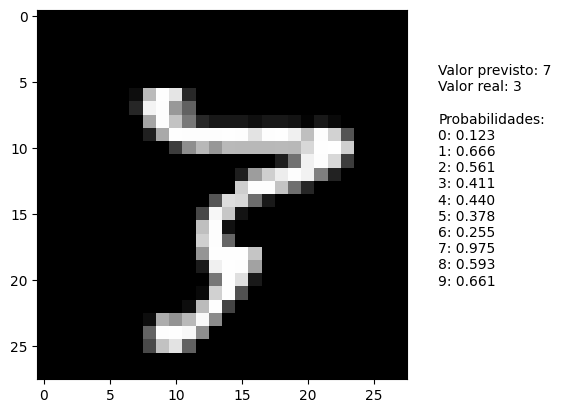

In [15]:

index = 168

# ============================
fig, ax = plt.subplots()
prevision = np.argmax(model.predict(x_test[index:index + 1, :]))
probabilities = model.predict(x_test[index:index+1, :])[0]

ax.imshow(np.reshape(x_test[index:index + 1, :], (28, 28)), cmap='gray')

# Definir o texto
texto = f'''
Valor previsto: {prevision}
Valor real: {int(y_test[index])}

Probabilidades:
0: {probabilities[0]:.3f}
1: {probabilities[1]:.3f}
2: {probabilities[2]:.3f}
3: {probabilities[3]:.3f}
4: {probabilities[4]:.3f}
5: {probabilities[5]:.3f}
6: {probabilities[6]:.3f}
7: {probabilities[7]:.3f}
8: {probabilities[8]:.3f}
9: {probabilities[9]:.3f}


'''

# Posicionar o texto usando figtext
fig.text(0.85, 0.5, texto, va='center', ha='left', fontsize=10)
plt.show()

In [58]:
def analyze_data(histories, title):
    colors = ["red", "blue", "green"]
    for i in range(len(histories)):
      train_accuracy = histories[i].history['accuracy']
      train_error = [1 - acc for acc in train_accuracy]

      # val_accuracy = histories[i].history['val_accuracy']
      # val_error = [1 - acc for acc in val_accuracy]

      plt.plot(train_error, color=colors[i])
    plt.title(title)
    plt.ylabel('Error')
    plt.xlabel('Epoch')
    plt.legend(['hidden_size=25', 'hidden_size=50', 'hidden_size=100'], loc='upper right')
    plt.show()

def analyze_data_2(history, title):
    colors = ["red", "blue"]
    train_accuracy = history.history['accuracy']
    train_error = [1 - acc for acc in train_accuracy]

    val_accuracy = history.history['val_accuracy']
    val_error = [1 - acc for acc in val_accuracy]
 
    plt.plot(train_error, color=colors[0])
    plt.plot(val_error, color=colors[1])
    plt.title(title)
    plt.ylabel('Error')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

### Gradient Descent

In [20]:
learning_rates = [0.5, 1, 10]
hidden_sizes = [25, 50, 100]
batch_size=5000
histories_gradient_descent = []

for i in range(len(learning_rates)):
  histories = []
  for j in range(len(hidden_sizes)):
    model, history = model_generation(batch_size=batch_size, learning_rate=learning_rates[i], hidden_size=hidden_sizes[j], epochs=50)
    histories.append(history)
  histories_gradient_descent.append(histories)

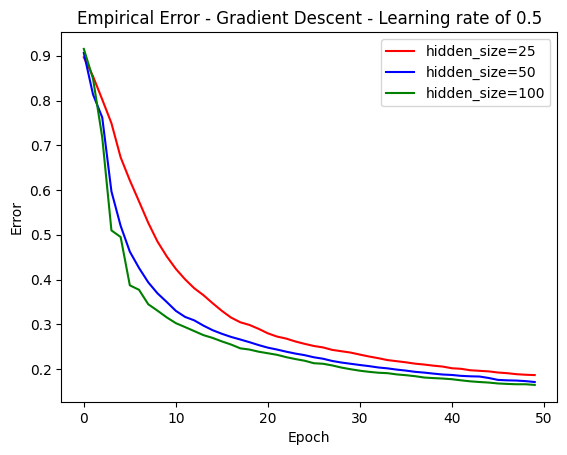

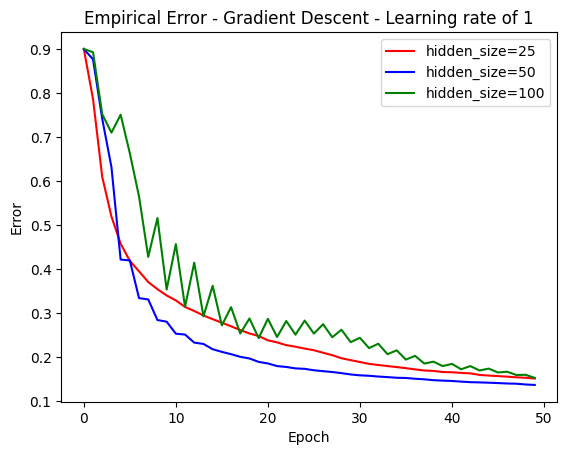

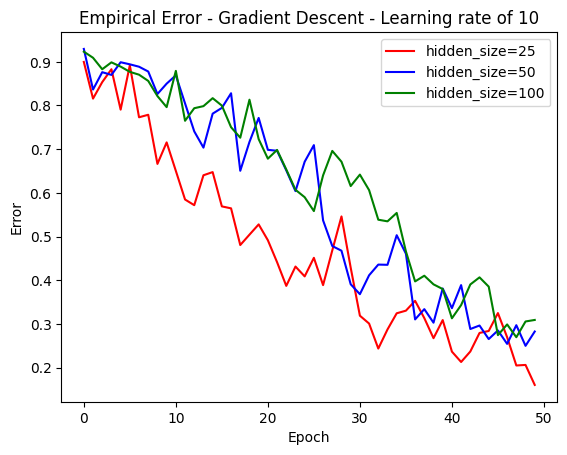

In [22]:
titles = ['Learning rate of 0.5', 'Learning rate of 1', 'Learning rate of 10']
for i in range(len(histories_gradient_descent)):
  analyze_data(histories_gradient_descent[i], f'Empirical Error - Gradient Descent - {titles[i]}')

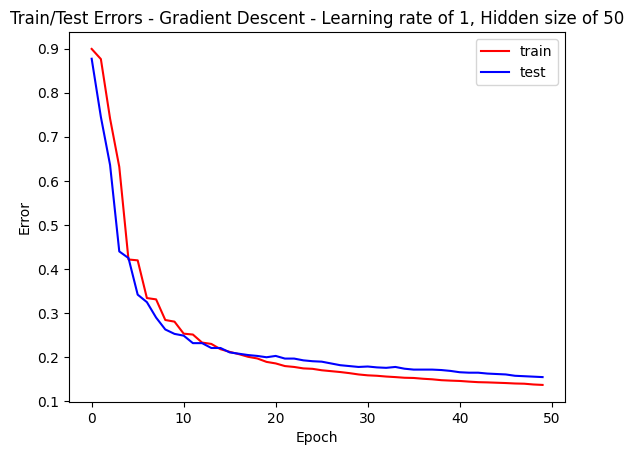

In [59]:
analyze_data_2(histories_gradient_descent[1][1], 'Train/Test Errors - Gradient Descent - Learning rate of 1, Hidden size of 50')

### Stochastic Gradient Descent

In [50]:
learning_rates = [0.5, 1, 10]
hidden_sizes = [25, 50, 100]
batch_size=2
histories_stochastic_gradient_descent = []

for i in range(len(learning_rates)):
  histories = []
  for j in range(len(hidden_sizes)):
    model, history = model_generation(batch_size=batch_size, learning_rate=learning_rates[i], hidden_size=hidden_sizes[j], epochs=50)
    histories.append(history)
  histories_stochastic_gradient_descent.append(histories)

2023-05-27 19:58:16.954097: I tensorflow/core/common_runtime/executor.cc:1210] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Expected tensor of type int64 but got type float
	 [[{{node Equal}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'Equal' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/homebrew/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/opt/homebrew/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
      handle._run()
    File "/opt/homebrew/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/l3/flgz2qlx0jz4g699bnwrqsb40000gn/T/ipykernel_4825/84386677.py", line 9, in <module>
      model, history = model_generation(batch_size=batch_size, learning_rate=learning_rates[i], hidden_size=hidden_sizes[j], epochs=50)
    File "/var/folders/l3/flgz2qlx0jz4g699bnwrqsb40000gn/T/ipykernel_4825/2152457774.py", line 19, in model_generation
      history = model.fit(X_train, Y_one_hot_train,
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/engine/training.py", line 1791, in fit
      val_logs = self.evaluate(
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/engine/training.py", line 2200, in evaluate
      logs = test_function_runner.run_step(
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/engine/training.py", line 4000, in run_step
      tmp_logs = self._function(dataset_or_iterator)
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/engine/training.py", line 1972, in test_function
      return step_function(self, iterator)
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/engine/training.py", line 1956, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/engine/training.py", line 1944, in run_step
      outputs = model.test_step(data)
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/engine/training.py", line 1853, in test_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/engine/training.py", line 1179, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/metrics/base_metric.py", line 723, in update_state
      matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/metrics/accuracy_metrics.py", line 426, in categorical_accuracy
      return metrics_utils.sparse_categorical_matches(
    File "/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/keras/src/utils/metrics_utils.py", line 968, in sparse_categorical_matches
      matches = tf.cast(tf.equal(y_true, y_pred), backend.floatx())
Node: 'Equal'
Expected tensor of type int64 but got type float
	 [[{{node Equal}}]] [Op:__inference_test_function_8862412]

In [24]:
titles = ['Learning rate of 0.5', 'Learning rate of 1', 'Learning rate of 10']
for i in range(len(histories_stochastic_gradient_descent)):
  analyze_data(histories_stochastic_gradient_descent[i], f'Empirical Error - Stochastic Gradient Descent - {titles[i]}')

In [ ]:
analyze_data_2(histories_stochastic_gradient_descent[1][1], 'Train/Test Errors - Stochastic Gradient Descent - Learning rate of 1, Hidden size of 50')

### Mini-Batch - 10

In [43]:
learning_rates = [0.5, 1, 10]
hidden_sizes = [25, 50, 100]
titles = ['Learning rate of 0.5', 'Learning rate of 1', 'Learning rate of 10']
batch_size=10
histories_mini_batch_10 = []

for i in range(len(learning_rates)):
  histories = []
  for j in range(len(hidden_sizes)):
    model, history = model_generation(batch_size=batch_size, learning_rate=learning_rates[i], hidden_size=hidden_sizes[j], epochs=50)
    histories.append(history)
  histories_mini_batch_10.append(histories)

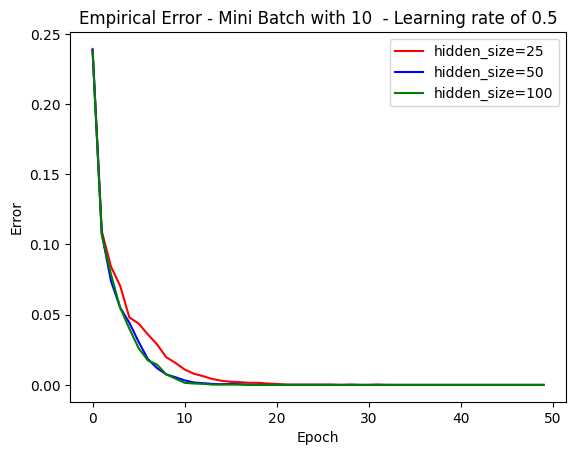

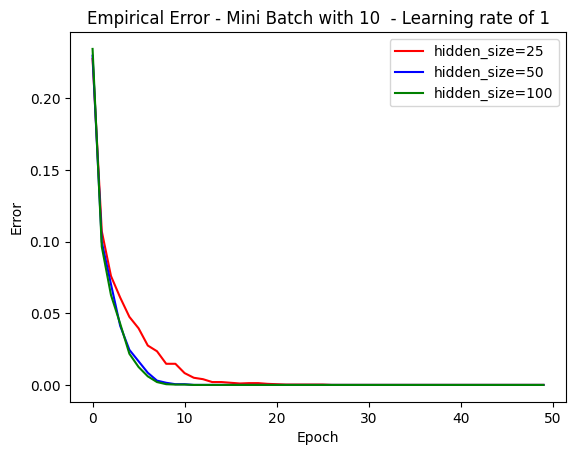

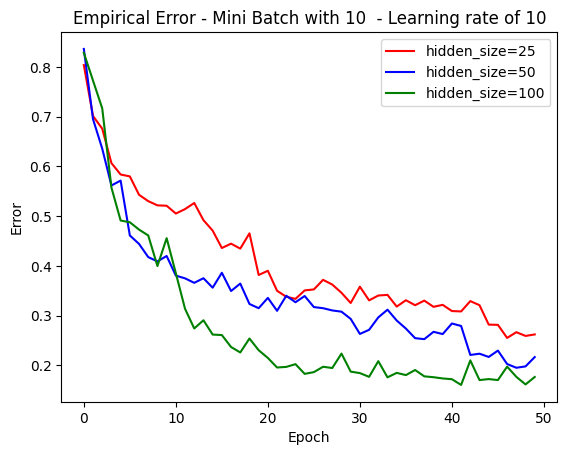

In [44]:
titles = ['Learning rate of 0.5', 'Learning rate of 1', 'Learning rate of 10']
for i in range(len(histories_mini_batch_10)):
  analyze_data(histories_mini_batch_10[i], f'Empirical Error - Mini Batch with 10  - {titles[i]}')

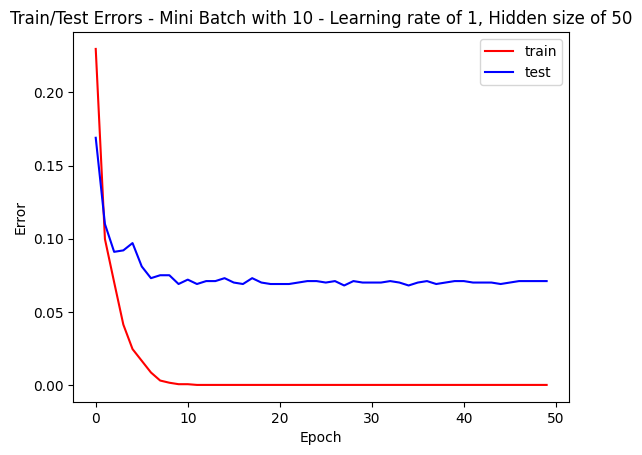

In [60]:
analyze_data_2(histories_mini_batch_10[1][1], 'Train/Test Errors - Mini Batch with 10 - Learning rate of 1, Hidden size of 50')

### Mini-Batch - 50

In [46]:
learning_rates = [0.5, 1, 10]
hidden_sizes = [25, 50, 100]
titles = ['Learning rate of 0.5', 'Learning rate of 1', 'Learning rate of 10']
batch_size=50
histories_mini_batch_50 = []

for i in range(len(learning_rates)):
  histories = []
  for j in range(len(hidden_sizes)):
    model, history = model_generation(batch_size=batch_size, learning_rate=learning_rates[i], hidden_size=hidden_sizes[j], epochs=50)
    histories.append(history)
  histories_mini_batch_50.append(histories)

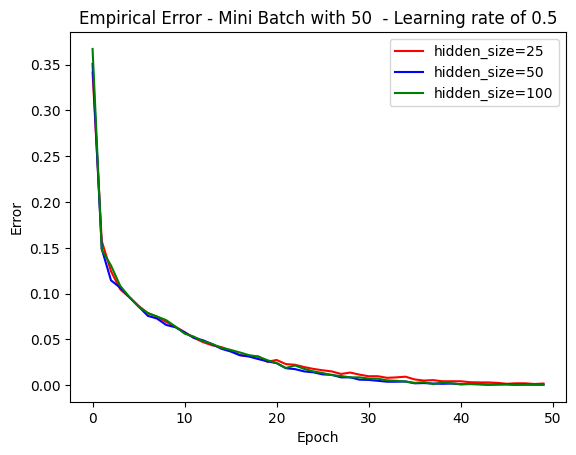

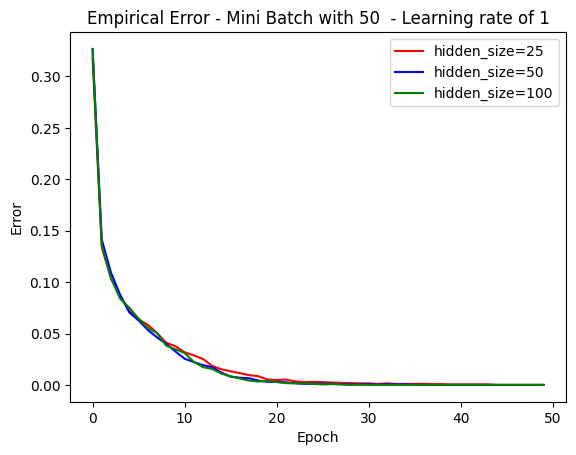

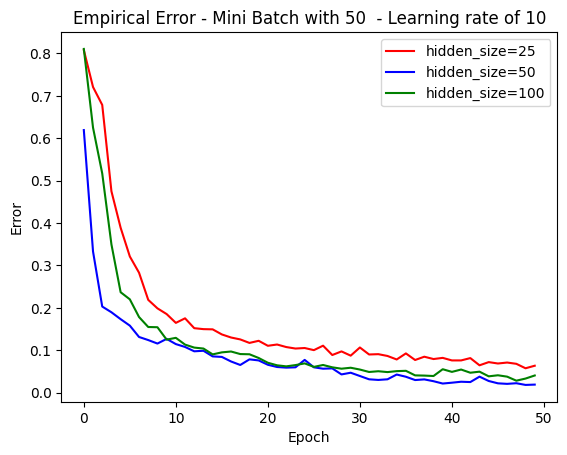

In [47]:
titles = ['Learning rate of 0.5', 'Learning rate of 1', 'Learning rate of 10']
for i in range(len(histories_mini_batch_50)):
  analyze_data(histories_mini_batch_50[i], f'Empirical Error - Mini Batch with 50  - {titles[i]}')

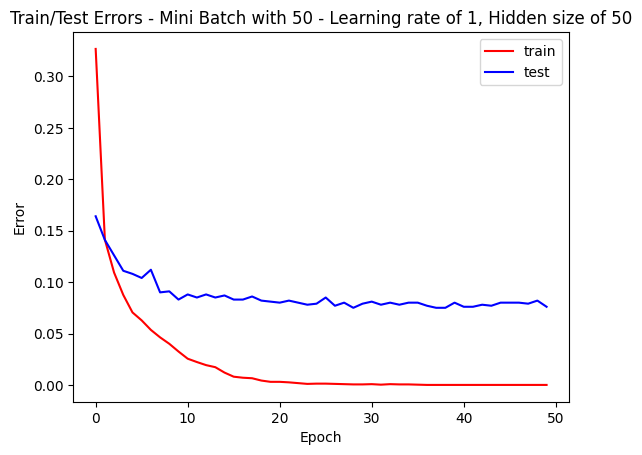

In [61]:
analyze_data_2(histories_mini_batch_50[1][1], 'Train/Test Errors - Mini Batch with 50 - Learning rate of 1, Hidden size of 50')